# 1. Load relevant libraries

In [1]:
pip install xgboost

In [2]:
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Statisical analysis
import scipy.stats as stats

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, RobustScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBClassifier

# 2. Load dataset

In [3]:
# Getting the data
# First, we need to import the data. We will be working with the training dataset, while the testing dataset will be used for prediction purposes only.

training = pd.read_csv(r'C:\Users\nurfazilla\Desktop\Kaggle\1. Titanic\train.csv')
test = pd.read_csv(r'C:\Users\nurfazilla\Desktop\Kaggle\1. Titanic\test.csv')
gender = pd.read_csv(r'C:\Users\nurfazilla\Desktop\Kaggle\1. Titanic\gender_submission.csv')

# 3. Preliminary Analysis

## 3a. Data exploration

In [4]:
#to display all columns in the dataset. By default, usually Python will only display maximum of 20 columns
pd.pandas.set_option('display.max_columns', None)

In [5]:
# to display the first 5 rows of the training dataset
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# to display the first 5 rows of the testing dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# to display the first 5 rows of example of the submission
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
#print shape of training dataset with rows and columns.
training.shape

(891, 12)

In [9]:
#print shape of testing dataset with rows and columns.
test.shape

(418, 11)

In [10]:
#print shape of gender dataset with rows and columns.
gender.shape

(418, 2)

## 3b. Feature Exploration

In [11]:
#to display the type and sample size for each features
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Basic statistical measure for numerical features
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Basic statistical measure for categorical features
training.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Chaffee, Mr. Herbert Fuller",male,347082,G6,S
freq,1,577,7,4,644


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
test.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Cotterill, Mr. Henry Harry""""",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# 4. Feature Engineering

## 4a. Creation of new features

In [16]:
# Create column of number of Family members onboard
training['Family_Size'] = training.Parch + training.SibSp

In [17]:
# Checking the inclusion of the Family_Size
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


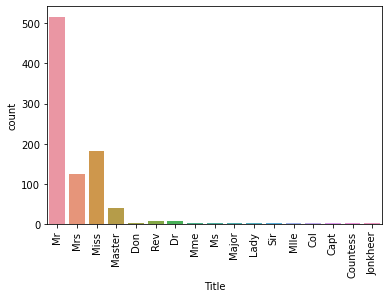

In [18]:
#Import the regex 
import re

#Extract tht Passengers Title, store the Title in a column and plot a barplot
training['Title'] = training.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=training);
plt.xticks(rotation=90);

In [19]:
#Checking the count values for Title
training.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Capt          1
Sir           1
Countess      1
Jonkheer      1
Ms            1
Don           1
Mme           1
Name: Title, dtype: int64

In [20]:
# Replace with appropriate title
training['Title'] = training['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
training['Title'] = training['Title'].replace(['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Misc')

In [21]:
#Checking the count values for Title
training.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Misc       23
Name: Title, dtype: int64

In [22]:
#Recategorizing the Title for Misc according to gender
training['Title'] = np.where(((training.Sex == 'male') & (training.Title == 'Misc')),'Misc_Male',training.Title)
training['Title'] = np.where(((training.Sex == 'female') & (training.Title == 'Misc')),'Misc_Female',training.Title)

In [23]:
#Checking the data
training[training['Title'].isin(['Misc_Male','Misc_Female'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0,Misc_Male
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,0,Misc_Male
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,0,Misc_Male
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,2,Misc_Male
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,1,Misc_Male
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,0,Misc_Male
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,0,Misc_Male
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,0,Misc_Male
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,0,Misc_Male
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,Misc_Female


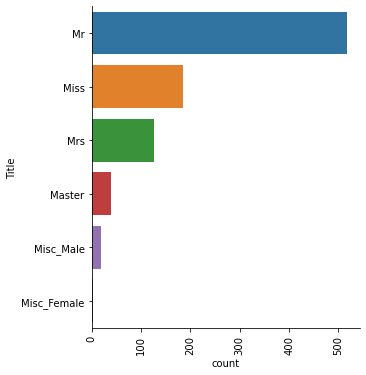

In [24]:
# Plot the new category for Title feature
sns.catplot(y ='Title', kind = "count",data = training,order=training['Title'].value_counts().index)
plt.xticks(rotation=90);

In [25]:
# Checking the number of unique count for Ticket category
training['Ticket'].value_counts().head(10)

347082          7
CA. 2343        7
1601            7
347088          6
3101295         6
CA 2144         6
382652          5
S.O.C. 14879    5
349909          4
113760          4
Name: Ticket, dtype: int64

In [26]:
#Sort the Ticket to observe the similarity with other features for those who share the same ticket number
training.sort_values(by=['Ticket']).head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,0,Miss
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,0,Miss
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,0,Misc_Female
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,2,Mr
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,2,Mrs
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,2,Miss


In [27]:
#Create a Ticket_Count feature to calculate Fare Per Passenger
training['Ticket_Count']=training.groupby('Ticket')['Fare'].transform('count')

In [28]:
training.sort_values(by=['Ticket']).head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,0,Miss,3
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,0,Miss,3
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,0,Misc_Female,3
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,2,Mr,3
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,2,Mrs,3
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,2,Miss,3


In [29]:
#Create the Fare_Per Person feature
training['Fare_PerPerson'] = training['Fare'] / training['Ticket_Count']

In [30]:
#Display the first five rows of the dataset
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count,Fare_PerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,1,8.0500


## 4b. Treating missing values

In [31]:
#Check the number of missing value for each feature
training.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Family_Size         0
Title               0
Ticket_Count        0
Fare_PerPerson      0
dtype: int64

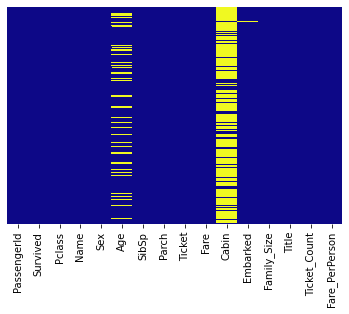

In [32]:
#Visualize missing data using seaborn
sns.heatmap(training.isnull(),yticklabels = False, cbar=False,cmap ='plasma');

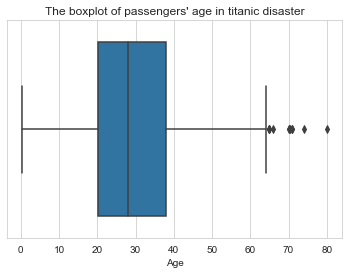

In [33]:
#Check any outliers for Age
sns.set_style('whitegrid')
sns.boxplot(x='Age',data=training)
plt.title("The boxplot of passengers' age in titanic disaster");

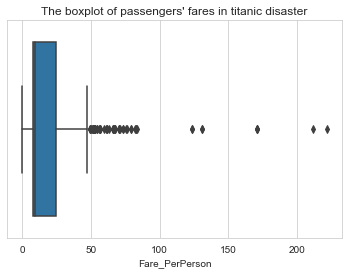

In [34]:
#Check any outliers for Fares_per person
sns.set_style('whitegrid')
sns.boxplot(x='Fare_PerPerson',data=training)
plt.title("The boxplot of passengers' fares in titanic disaster");

In [35]:
#Mean Imputation
training['Age_Mean'] = training['Age'].fillna(training.Age.mean())

#Median Imputation
training['Age_Median'] = training['Age'].fillna(training.Age.median())

#Random Imputation
random_value=training['Age'].dropna().sample(training['Age'].isnull().sum(),random_state=0)
#pandas need to have same index in order to merge the dataset
random_value.index=training[training['Age'].isnull()].index
training['Age_Random'] = training['Age'].fillna(random_value)

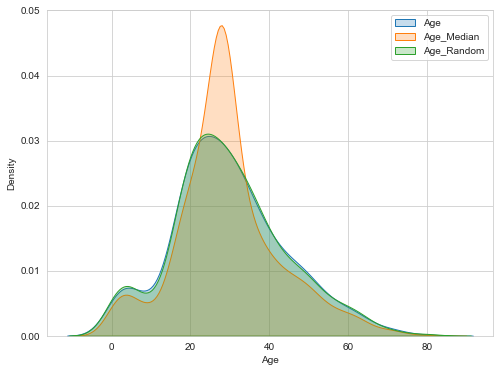

In [36]:
#Compare the distribution among original distribution, and using median and random imputation
plt.figure(figsize=(8,6))
sns.kdeplot(training['Age'], shade =True, label = 'Age' )
sns.kdeplot(training['Age_Median'], shade =True, label = 'Age_Median')
sns.kdeplot(training['Age_Random'], shade = True, label = 'Age_Random')

plt.legend()
plt.show()

In [37]:
#Check the paseengers profile with null missing value for Embarked feature
training.loc[training['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count,Fare_PerPerson,Age_Mean,Age_Median,Age_Random
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,Miss,2,40.0,38.0,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,Mrs,2,40.0,62.0,62.0,62.0


In [38]:
#Checking the highest value of the port of embarkation
training.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
#Impute the missing value for Embarked
training.loc[training['Embarked'].isnull(), 'Embarked'] = 'S'

In [40]:
#Checking the data once imputation
training.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count,Fare_PerPerson,Age_Mean,Age_Median,Age_Random
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,0,Miss,2,40.0,38.0,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,0,Mrs,2,40.0,62.0,62.0,62.0


In [41]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
training['Deck'] = training['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

In [42]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count,Fare_PerPerson,Age_Mean,Age_Median,Age_Random,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1,7.2500,22.0,22.0,22.0,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,71.2833,38.0,38.0,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,7.9250,26.0,26.0,26.0,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,2,26.5500,35.0,35.0,35.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,1,8.0500,35.0,35.0,35.0,M


# 5. Univariate, bivariate and multivariate

## 5a. Univariate

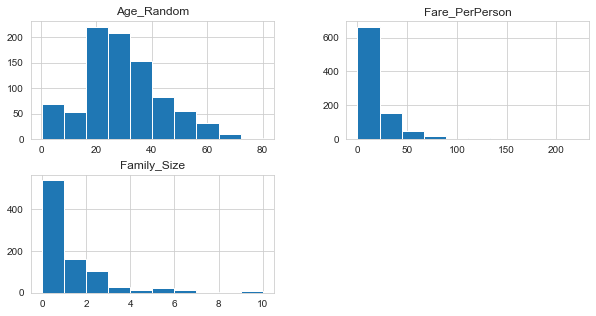

In [43]:
df = training[['Age_Random','Fare_PerPerson','Family_Size']]
df.hist(bins=10,figsize = (10,5))
plt.show()

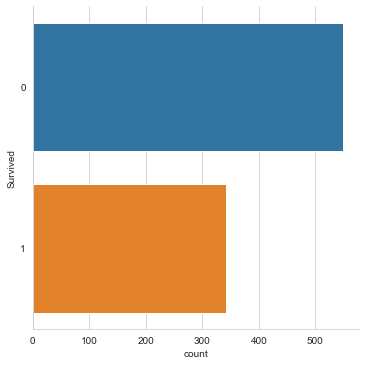

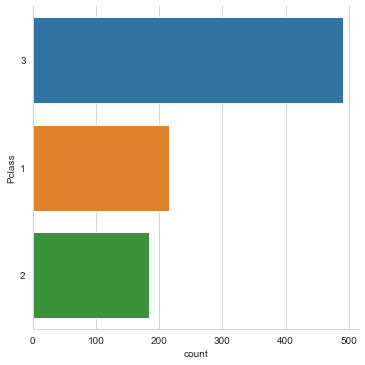

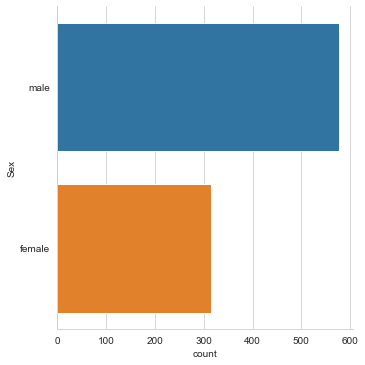

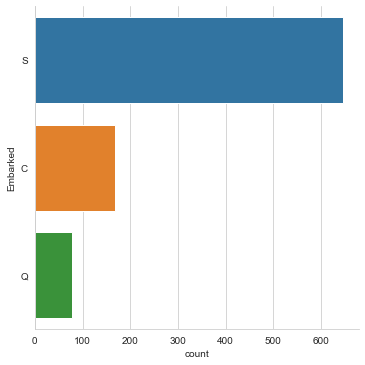

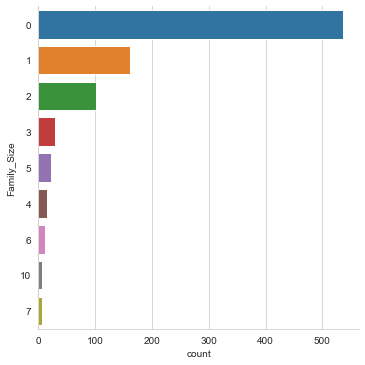

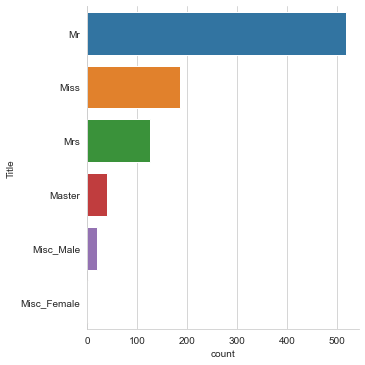

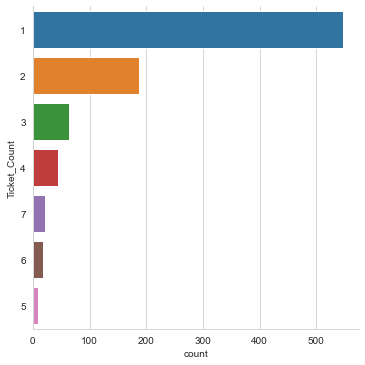

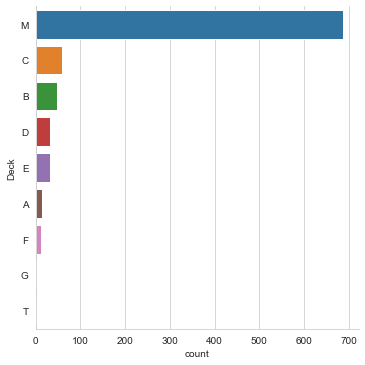

In [44]:
df_cat = training[['Survived','Pclass','Sex','Embarked','Family_Size','Title','Ticket_Count','Deck']]
for x in df_cat:
    sns.catplot(y = df_cat[x], kind = 'count', data = df_cat, order = df_cat[x].value_counts().index)
    plt.show()

### Replacing T by A

In [45]:
#Checking the passenger's profile who stayed in Deck T
training.loc[training['Deck'] == 'T',:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count,Fare_PerPerson,Age_Mean,Age_Median,Age_Random,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,0,Mr,1,35.5,45.0,45.0,45.0,T


In [46]:
#Replace with the nearest deck
training['Deck'] = training['Deck'].replace({'T':'A'})

In [47]:
#Checking the replacement value
training.iloc[339,:]

PassengerId                                340
Survived                                     0
Pclass                                       1
Name              Blackwell, Mr. Stephen Weart
Sex                                       male
Age                                         45
SibSp                                        0
Parch                                        0
Ticket                                  113784
Fare                                      35.5
Cabin                                        T
Embarked                                     S
Family_Size                                  0
Title                                       Mr
Ticket_Count                                 1
Fare_PerPerson                            35.5
Age_Mean                                    45
Age_Median                                  45
Age_Random                                  45
Deck                                         A
Name: 339, dtype: object

### Checking the fares feature

In [48]:
training.loc[training['Fare'] == 0,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count,Fare_PerPerson,Age_Mean,Age_Median,Age_Random,Deck
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0,Mr,4,0.0,36.000000,36.0,36.0,M
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0,Mr,1,0.0,40.000000,40.0,40.0,B
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0,Mr,4,0.0,25.000000,25.0,25.0,M
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0,Mr,3,0.0,29.699118,28.0,57.0,M
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0,Mr,4,0.0,19.000000,19.0,19.0,M
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0,Mr,3,0.0,29.699118,28.0,49.0,M
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0,Mr,3,0.0,29.699118,28.0,8.0,M
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0,Mr,1,0.0,29.699118,28.0,18.0,M
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0,Mr,4,0.0,49.000000,49.0,49.0,M
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0,Mr,1,0.0,29.699118,28.0,27.0,M


### Create feature - travelling alone or not alone

In [49]:
training['Travel_Alone'] = training.apply(lambda row: row.Family_Size == 0, axis = 1)
training.loc[training['Travel_Alone'] == True, 'Travel_Alone'] = 1
training.loc[training['Travel_Alone'] == False, 'Travel_Alone'] = 0

In [50]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Ticket_Count,Fare_PerPerson,Age_Mean,Age_Median,Age_Random,Deck,Travel_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1,7.2500,22.0,22.0,22.0,M,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,71.2833,38.0,38.0,38.0,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,7.9250,26.0,26.0,26.0,M,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,2,26.5500,35.0,35.0,35.0,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,1,8.0500,35.0,35.0,35.0,M,1


### Categorizing age

In [51]:
#Discretizing the Age feature, other alternatives can use binarizer, digitize in the numpy library

age_cat =['Infant','Children','Young Adult','Adult']
training['Age_Cut'] = pd.cut(training['Age_Random'],(0,2,18,30,80), labels = age_cat)

In [52]:
#Checking the counts after descritizing
training.Age_Cut.value_counts()

Adult          382
Young Adult    339
Children       139
Infant          31
Name: Age_Cut, dtype: int64

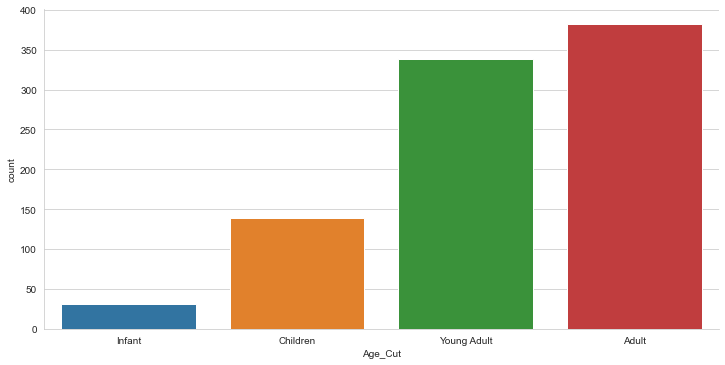

In [53]:
#Plotting the Age_Cut
sns.catplot(x='Age_Cut',data=training, kind='count', aspect =2.0);

## 5b. Bivariate

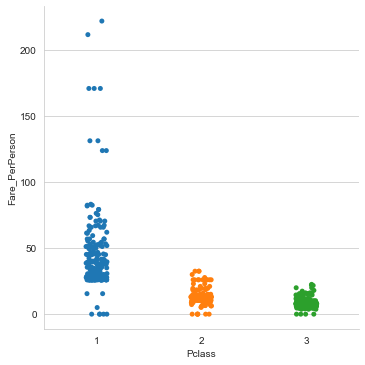

In [54]:
#Checking how fare per person distributed among classes
sns.catplot(x="Pclass", y="Fare_PerPerson", kind="strip", data=training);

C:\Users\nurfazilla\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


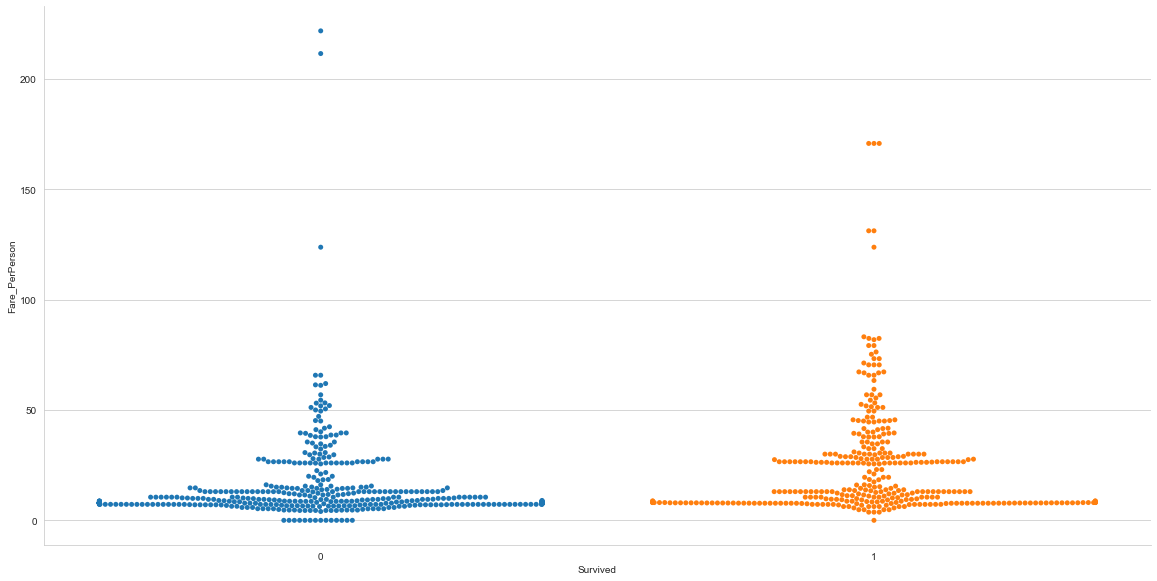

In [55]:
#Checking how fare per person distributed among Survived
sns.catplot(x="Survived", y="Fare_PerPerson", aspect=2.0, kind="swarm", data=training, height = 8);

In [56]:
#Discretizing the fare feature
Fare_cat = ["<$7.73", "$7.73 - $8.05", "$8.05 - $11.73", "$11.73 - $26.55", "$26.55 - Max"]
training['Fare_Cut'] = pd.qcut(training['Fare_PerPerson'],5, labels =Fare_cat)

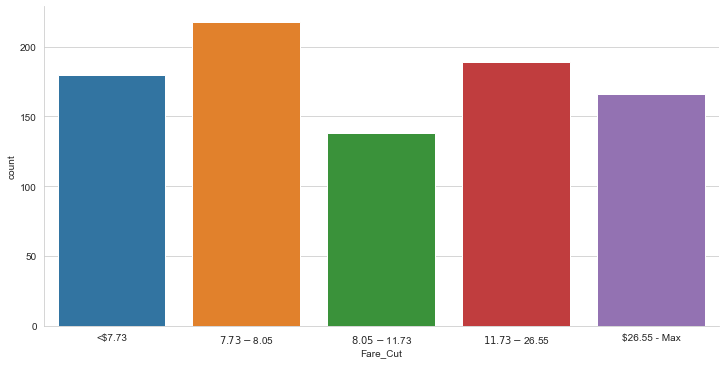

In [57]:
#Plotting the fare cut
sns.catplot(x='Fare_Cut',data=training, kind='count', aspect =2.0);

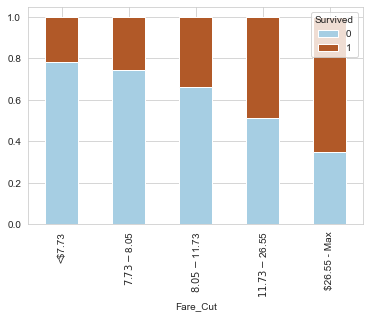

In [58]:
#Checking the fare by category among Survived
training.groupby('Fare_Cut')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

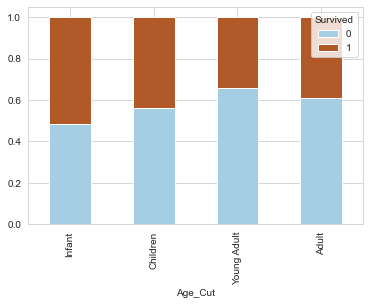

In [59]:
#Checking the age by category among Survived
training.groupby('Age_Cut')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

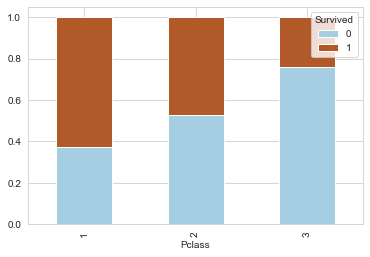

In [60]:
#Checking the class among Survived
training.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

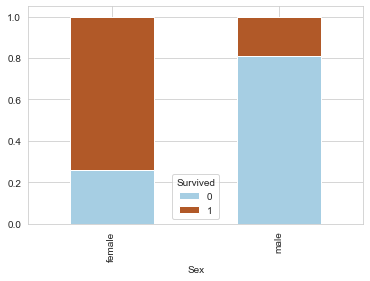

In [61]:
training.groupby('Sex')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

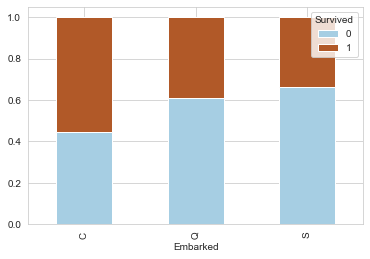

In [62]:
training.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

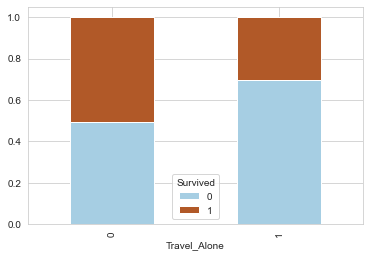

In [63]:
training.groupby('Travel_Alone')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

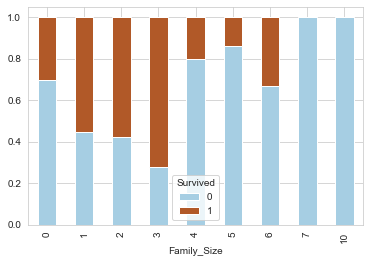

In [64]:
training.groupby('Family_Size')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

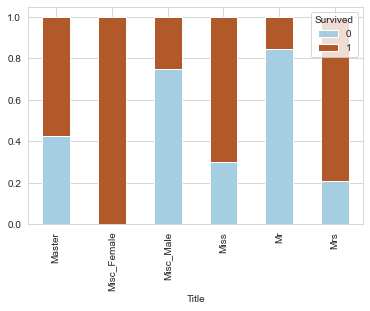

In [65]:
training.groupby('Title')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

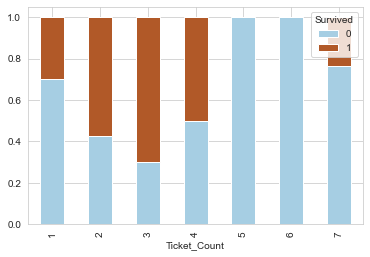

In [66]:
training.groupby('Ticket_Count')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

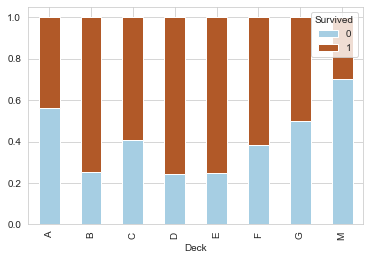

In [67]:
training.groupby('Deck')['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Paired');

In [68]:
crosstab = pd.crosstab(training['Sex'], training["Survived"])
crosstab

Survived,0,1
Sex,,
female,81,233
male,468,109


In [69]:
stats.chi2_contingency(crosstab)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

## 5c. Multivariate

In [70]:
training.groupby(['Sex','Pclass']).agg(Fares_Per_Passengers= ('Fare_PerPerson', 'mean')).unstack('Pclass')

Fares_Per_Passengers                     
Pclass                    1          2         3
Sex                                             
female            47.536636  14.628354  8.112689
male              40.655993  12.403735  8.074722

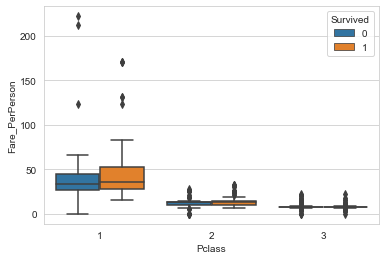

In [71]:
sns.boxplot(x = 'Pclass', y='Fare_PerPerson', hue='Survived', data=training);

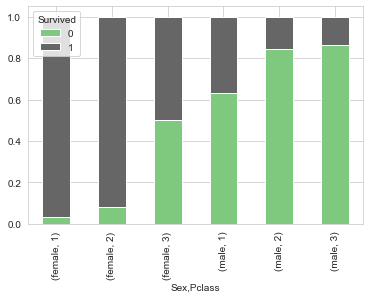

In [72]:
training.groupby(['Sex','Pclass'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Accent');

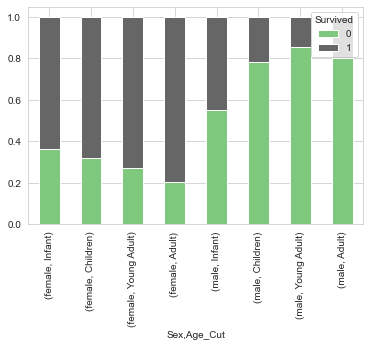

In [73]:
training.groupby(['Sex','Age_Cut'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Accent');

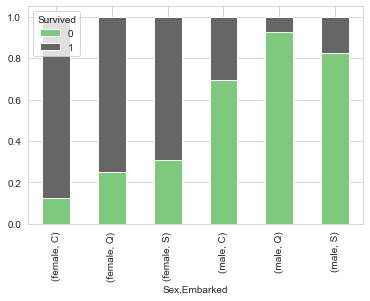

In [74]:
training.groupby(['Sex','Embarked'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Accent');

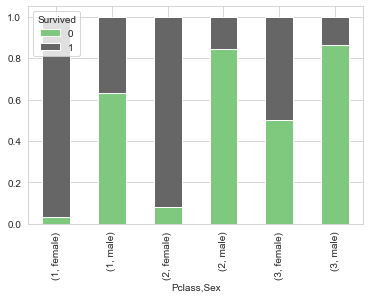

In [75]:
training.groupby(['Pclass','Sex'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Accent');

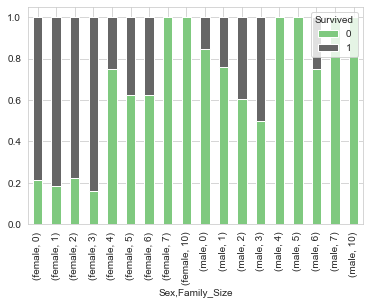

In [76]:
training.groupby(['Sex','Family_Size'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Accent');

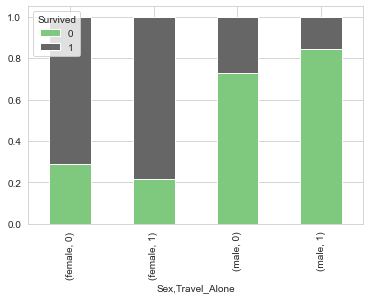

In [77]:
training.groupby(['Sex','Travel_Alone'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Accent');

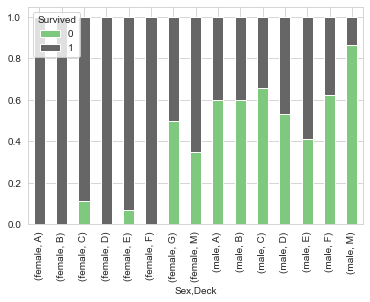

In [78]:
training.groupby(['Sex','Deck'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True, cmap='Accent');

# 6. Data Preparation for Machine Learning

## 6a. Checking all available features for training set

In [79]:
#Checking all the available features
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title',
       'Ticket_Count', 'Fare_PerPerson', 'Age_Mean', 'Age_Median',
       'Age_Random', 'Deck', 'Travel_Alone', 'Age_Cut', 'Fare_Cut'],
      dtype='object')

In [80]:
training.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
Family_Size          int64
Title               object
Ticket_Count         int64
Fare_PerPerson     float64
Age_Mean           float64
Age_Median         float64
Age_Random         float64
Deck                object
Travel_Alone        object
Age_Cut           category
Fare_Cut          category
dtype: object

In [81]:
#Select features to be used for machine learning algorithm
df_train = training[['Survived','Pclass','Sex','Age_Cut','Family_Size',"Title",'Fare_PerPerson','Embarked']]

In [196]:
df_train.dtypes

Survived                  int64
Pclass                    int64
Age_Cut                   int32
Family_Size               int64
female                  float64
male                    float64
Master                  float64
Misc_Female             float64
Misc_Male               float64
Miss                    float64
Mr                      float64
Mrs                     float64
C                       float64
Q                       float64
S                       float64
Fare_PerPerson_scale    float64
dtype: object

In [82]:
df_train.head(3)

,Survived,Pclass,Sex,Age_Cut,Family_Size,Title,Fare_PerPerson,Embarked
0,0,3,male,Young Adult,1,Mr,7.2500,S
1,1,1,female,Adult,1,Mrs,71.2833,C
2,1,3,female,Young Adult,0,Miss,7.9250,S


## 6b. Encoding and Scaling the training set

We will be performing the following preprocessing

1. One Hot Encoding: Sex and Title
2. Label Encoder: Age Cut
3. Robust Scaler: Fare_Per_Person

#### Onehot Encoder

In [83]:
#Transforming the categorical feature
ohe = OneHotEncoder(sparse = False)
encoded = ohe.fit_transform(df_train[['Sex','Title','Embarked']])

In [84]:
#Checking the array catagories
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['Master', 'Misc_Female', 'Misc_Male', 'Miss', 'Mr', 'Mrs'],
       dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [85]:
encoded

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [86]:
#converting the encoded to data frame
column = ['female', 'male','Master', 'Misc_Female', 'Misc_Male', 'Miss', 'Mr', 'Mrs','C', 'Q', 'S']
a = pd.DataFrame(encoded, columns=column)

In [87]:
#merge the two dataframe
df_train = df_train.join(a)

In [88]:
df_train.head(3)

,Survived,Pclass,Sex,Age_Cut,Family_Size,Title,Fare_PerPerson,Embarked,female,male,Master,Misc_Female,Misc_Male,Miss,Mr,Mrs,C,Q,S
0,0,3,male,Young Adult,1,Mr,7.2500,S,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,female,Adult,1,Mrs,71.2833,C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,female,Young Adult,0,Miss,7.9250,S,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [89]:
#Dropping all unused features
df_train.drop(['Sex','Title','Embarked'], axis =1, inplace = True)

In [90]:
df_train.head(3)

,Survived,Pclass,Age_Cut,Family_Size,Fare_PerPerson,female,male,Master,Misc_Female,Misc_Male,Miss,Mr,Mrs,C,Q,S
0,0,3,Young Adult,1,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,Adult,1,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,Young Adult,0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Label Encoder

In [91]:
df_train.Age_Cut = LabelEncoder().fit_transform(df_train.Age_Cut)

In [92]:
df_train.head()

,Survived,Pclass,Age_Cut,Family_Size,Fare_PerPerson,female,male,Master,Misc_Female,Misc_Male,Miss,Mr,Mrs,C,Q,S
0,0,3,3,1,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,1,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,3,0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,1,26.5500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Robust Scaler

In [93]:
#Transforming the numerical features
rs = RobustScaler()
scaling = rs.fit_transform(df_train[['Fare_PerPerson']])

In [94]:
#converting the scaling to data frame
column = ['Fare_PerPerson_scale']
c = pd.DataFrame(scaling, columns=column)

In [95]:
#merge the two dataframe
df_train = df_train.join(c)

In [96]:
#Dropping all unused features
df_train.drop(['Fare_PerPerson'], axis =1, inplace = True)

In [97]:
df_train.isnull().sum()

Survived                0
Pclass                  0
Age_Cut                 0
Family_Size             0
female                  0
male                    0
Master                  0
Misc_Female             0
Misc_Male               0
Miss                    0
Mr                      0
Mrs                     0
C                       0
Q                       0
S                       0
Fare_PerPerson_scale    0
dtype: int64

## 6c. Preprocessing the testing set

In [98]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 1. Dealing with fares and ticket

In [99]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [100]:
#Mean Imputation
test['Fare_Mean'] = test['Fare'].fillna(test.Fare.mean())

#Median Imputation
test['Fare_Median'] = test['Fare'].fillna(test.Fare.median())

#Random Imputation
random_value_fare=test['Fare'].dropna().sample(test['Fare'].isnull().sum(),random_state=0)
#pandas need to have same index in order to merge the dataset
random_value_fare.index=test[test['Fare'].isnull()].index
test['Fare_Random'] = test['Fare'].fillna(random_value_fare)

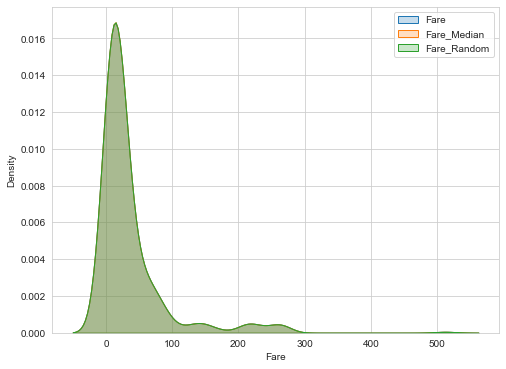

In [101]:
#Compare the distribution among original distribution, and using median and random imputation
plt.figure(figsize=(8,6))
sns.kdeplot(test['Fare'], shade =True, label = 'Fare' )
sns.kdeplot(test['Fare_Median'], shade =True, label = 'Fare_Median')
sns.kdeplot(test['Fare_Random'], shade = True, label = 'Fare_Random')

plt.legend()
plt.show()

In [102]:
#Create a Ticket_Count feature to calculate Fare Per Passenger
test['Ticket_Count']=test.groupby('Ticket')['Fare_Random'].transform('count')

In [103]:
#Create the Fare_Per Person feature
test['Fare_PerPerson'] = test['Fare_Random'] / test['Ticket_Count']

In [104]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Mean,Fare_Median,Fare_Random,Ticket_Count,Fare_PerPerson
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.0500,8.0500,8.0500,1,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.9000,108.9000,108.9000,1,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.2500,7.2500,7.2500,1,7.2500
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.0500,8.0500,8.0500,1,8.0500
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,22.3583,22.3583,22.3583,1,22.3583


#### 2. Dealing with age feature

In [105]:
#Random Imputation
random_value=test['Age'].dropna().sample(test['Age'].isnull().sum(),random_state=0)
#pandas need to have same index in order to merge the dataset
random_value.index=test[test['Age'].isnull()].index
test['Age_Random'] = test['Age'].fillna(random_value)

In [106]:
#Discretizing the Age feature, other alternatives can use binarizer, digitize in the numpy library

age_cat_test =['Infant','Children','Young Adult','Adult']
test['Age_Cut'] = pd.cut(test['Age_Random'],(0,2,18,30,80), labels = age_cat)

In [107]:
test.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                86
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin             327
Embarked            0
Fare_Mean           0
Fare_Median         0
Fare_Random         0
Ticket_Count        0
Fare_PerPerson      0
Age_Random          0
Age_Cut             0
dtype: int64

#### 3. Create Family_Size feature

In [108]:
# Create column of number of Family members onboard
test['Family_Size'] = test.Parch + test.SibSp

#### 4. Creating Title feature

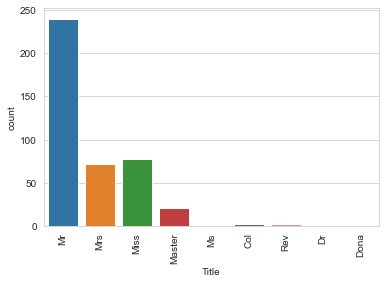

In [109]:
#Import the regex 
import re

#Extract tht Passengers Title, store the Title in a column and plot a barplot
test['Title'] = test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=test);
plt.xticks(rotation=90);

In [110]:
# Replace with appropriate title
test['Title'] = test['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
test['Title'] = test['Title'].replace(['Don', 'Dona','Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Misc')

In [111]:
# Replace the misc title according to their gender
test['Title'] = np.where(((test.Sex == 'male') & (test.Title == 'Misc')),'Misc_Male',test.Title)
test['Title'] = np.where(((test.Sex == 'female') & (test.Title == 'Misc')),'Misc_Female',test.Title)

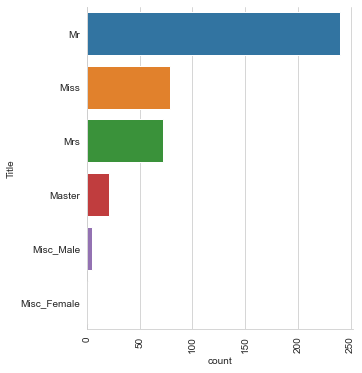

In [112]:
# Plot the new category for Title feature
sns.catplot(y ='Title', kind = "count",data = test,order=test['Title'].value_counts().index)
plt.xticks(rotation=90);

In [113]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Mean,Fare_Median,Fare_Random,Ticket_Count,Fare_PerPerson,Age_Random,Age_Cut,Family_Size,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,7.8292,7.8292,7.8292,1,7.8292,34.5,Adult,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,7.0000,7.0000,7.0000,1,7.0000,47.0,Adult,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,9.6875,9.6875,9.6875,1,9.6875,62.0,Adult,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8.6625,8.6625,8.6625,1,8.6625,27.0,Young Adult,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,12.2875,12.2875,12.2875,1,12.2875,22.0,Young Adult,2,Mrs


In [114]:
df_test = test[['PassengerId','Pclass','Sex','Age_Cut','Family_Size',"Title",'Fare_PerPerson','Embarked']]

In [115]:
df_test.head(3)

,PassengerId,Pclass,Sex,Age_Cut,Family_Size,Title,Fare_PerPerson,Embarked
0,892,3,male,Adult,0,Mr,7.8292,Q
1,893,3,female,Adult,1,Mrs,7.0000,S
2,894,2,male,Adult,0,Mr,9.6875,Q


In [116]:
df_test.dtypes

PassengerId          int64
Pclass               int64
Sex                 object
Age_Cut           category
Family_Size          int64
Title               object
Fare_PerPerson     float64
Embarked            object
dtype: object

## 6d. Encoding and scaling the testing set

In [117]:
from sklearn.compose import make_column_transformer

In [118]:
#Create transformer
age_category = ['Infant','Children','Young Adult','Adult'],
ct = make_column_transformer((OneHotEncoder(dtype='int64'),['Sex', 'Title','Embarked']),
                            (OrdinalEncoder(categories = age_category, dtype='int64'),['Age_Cut']),
                             (RobustScaler(), ['Fare_PerPerson']), 
                                remainder='passthrough')

In [119]:
ct_df_test = ct.fit_transform(df_test)

In [120]:
ct_df_test[:5]

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        -2.41808321e-01,  8.92000000e+02,  3.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  3.00000000e+00,
        -2.86160528e-01,  8.93000000e+02,  3.00000000e+00,
         1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        -1.42411665e-01,  8.94000000e+02,  2.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e

In [121]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [122]:
column = ['female','male','Master', 'Misc_Female', 'Misc_Male', 'Miss', 'Mr', 'Mrs','Cherbourg','Queenstown','Southampton','Age_Cut','Fare_PerPerson','PassengerId','Pclass','Family_Size']
df_test_final = pd.DataFrame(ct_df_test, columns = column)
df_test_final.head(10)

,female,male,Master,Misc_Female,Misc_Male,Miss,Mr,Mrs,Cherbourg,Queenstown,Southampton,Age_Cut,Fare_PerPerson,PassengerId,Pclass,Family_Size
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,-0.241808,892.0,3.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,-0.286161,893.0,3.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,-0.142412,894.0,2.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,-0.197237,895.0,3.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,-0.003343,896.0,3.0,2.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.167150,897.0,3.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.252506,898.0,3.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.890574,899.0,2.0,2.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.273901,900.0,3.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.631158,901.0,3.0,2.0


In [123]:
df_test.head(10)

,PassengerId,Pclass,Sex,Age_Cut,Family_Size,Title,Fare_PerPerson,Embarked
0,892,3,male,Adult,0,Mr,7.8292,Q
1,893,3,female,Adult,1,Mrs,7.0000,S
2,894,2,male,Adult,0,Mr,9.6875,Q
3,895,3,male,Young Adult,0,Mr,8.6625,S
4,896,3,female,Young Adult,2,Mrs,12.2875,S
5,897,3,male,Children,0,Mr,9.2250,S
6,898,3,female,Young Adult,0,Miss,7.6292,Q
7,899,2,male,Young Adult,2,Mr,29.0000,S
8,900,3,female,Children,0,Mrs,7.2292,C
9,901,3,male,Young Adult,2,Mr,24.1500,S


In [124]:
df_test_final.dtypes

female            float64
male              float64
Master            float64
Misc_Female       float64
Misc_Male         float64
Miss              float64
Mr                float64
Mrs               float64
Cherbourg         float64
Queenstown        float64
Southampton       float64
Age_Cut           float64
Fare_PerPerson    float64
PassengerId       float64
Pclass            float64
Family_Size       float64
dtype: object

## 6e. Final look on the training and testing dataset

In [125]:
df_train.head()

,Survived,Pclass,Age_Cut,Family_Size,female,male,Master,Misc_Female,Misc_Male,Miss,Mr,Mrs,C,Q,S,Fare_PerPerson_scale
0,0,3,3,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.096819
1,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.777952
2,1,3,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.055973
3,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.071059
4,0,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.048409


In [126]:
df_test_final.head()

,female,male,Master,Misc_Female,Misc_Male,Miss,Mr,Mrs,Cherbourg,Queenstown,Southampton,Age_Cut,Fare_PerPerson,PassengerId,Pclass,Family_Size
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,-0.241808,892.0,3.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,-0.286161,893.0,3.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,-0.142412,894.0,2.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,-0.197237,895.0,3.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,-0.003343,896.0,3.0,2.0


In [127]:
#rearranging the feature column according to train dataset

df_test_final = df_test_final[['Pclass','Age_Cut','Family_Size','female','male','Master','Misc_Female','Misc_Male','Miss','Mr','Mrs','Cherbourg','Queenstown','Southampton','Fare_PerPerson']]

In [128]:
df_test_final.head()

,Pclass,Age_Cut,Family_Size,female,male,Master,Misc_Female,Misc_Male,Miss,Mr,Mrs,Cherbourg,Queenstown,Southampton,Fare_PerPerson
0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.241808
1,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.286161
2,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.142412
3,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.197237
4,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.003343


In [129]:
df_train.shape

(891, 16)

In [130]:
df_test_final.shape

(418, 15)

In [131]:
df_test_final.isnull().sum()

Pclass            0
Age_Cut           0
Family_Size       0
female            0
male              0
Master            0
Misc_Female       0
Misc_Male         0
Miss              0
Mr                0
Mrs               0
Cherbourg         0
Queenstown        0
Southampton       0
Fare_PerPerson    0
dtype: int64

# 7. Machine Learning Model

### Choosing the dataframe for the machine learning algorithm

In [132]:
# Separate the dataframe into predictor and target feature
X = df_train.drop('Survived',axis = 1)
Y = df_train.Survived

### Split the selected dataframe to train and validation set

In [133]:
# split the dataset with a ratio of 80:20

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split( X, Y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Validation set:', X_valid.shape,  Y_valid.shape)

Train set: (712, 15) (712,)
Validation set: (179, 15) (179,)


### Fit the training set and observe the accuracy score on training and validation set

In [134]:
# The date time will contains hour,minute, second and microsecond
from datetime import datetime

In [135]:
#Logistic Regression

start_time = datetime.now()
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
trainscore_log = round(log.score(X_train,Y_train)*100,2)
validscore_log = round(log.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('Logistic Regression Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_log), '%')
print('Validation set:', str(validscore_log), '%')
print('Running time: {}'.format(end_time - start_time))

Logistic Regression Accuracy Score:
----------------
Training set: 83.99 %
Validation set: 81.01 %
Running time: 0:00:00.040890


In [136]:
#K Neighbours

start_time = datetime.now()
knn = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
knn.fit(X_train, Y_train)
trainscore_knn = round(knn.score(X_train,Y_train)*100,2)
validscore_knn = round(knn.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('K Neighbours Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_knn), '%')
print('Validation set:', str(validscore_knn), '%')
print('Running time: {}'.format(end_time - start_time))

K Neighbours Accuracy Score:
----------------
Training set: 84.83 %
Validation set: 84.36 %
Running time: 0:00:00.049867


In [137]:
#Support Vector Machine - Linear Kernel

start_time = datetime.now()
svc_lin = SVC(kernel='linear',random_state=0)
svc_lin.fit(X_train, Y_train)
trainscore_svc_lin = round(svc_lin.score(X_train,Y_train)*100,2)
validscore_svc_lin = round(svc_lin.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('SVC Linear Kernel Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_svc_lin), '%')
print('Validation set:', str(validscore_svc_lin), '%')
print('Running time: {}'.format(end_time - start_time))

SVC Linear Kernel Accuracy Score:
----------------
Training set: 82.72 %
Validation set: 82.68 %
Running time: 0:00:00.034907


In [138]:
#Support Vector Machine - RBF Kernel

start_time = datetime.now()
svc_rbf = SVC(kernel='rbf',random_state=0)
svc_rbf.fit(X_train, Y_train)
trainscore_svc_rbf = round(svc_rbf.score(X_train,Y_train)*100,2)
validscore_svc_rbf = round(svc_rbf.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('SVC RBF Kernel Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_svc_rbf), '%')
print('Validation set:', str(validscore_svc_rbf), '%')
print('Running time: {}'.format(end_time - start_time))

SVC RBF Kernel Accuracy Score:
----------------
Training set: 83.71 %
Validation set: 82.68 %
Running time: 0:00:00.037898


In [139]:
#Gaussian Naive Bayes

start_time = datetime.now()
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
trainscore_gauss = round(gauss.score(X_train,Y_train)*100,2)
validscore_gauss = round(gauss.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('Gaussian Naive Bayes Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_gauss), '%')
print('Validation set:', str(validscore_gauss), '%')
print('Running time: {}'.format(end_time - start_time))

Gaussian Naive Bayes Accuracy Score:
----------------
Training set: 80.48 %
Validation set: 82.68 %
Running time: 0:00:00.011960


In [140]:
#Decision Trees

start_time = datetime.now()
tree = DecisionTreeClassifier(criterion ='entropy', random_state =0)
tree.fit(X_train, Y_train)
trainscore_tree = round(tree.score(X_train,Y_train)*100,2)
validscore_tree = round(tree.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('Decision Trees Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_tree), '%')
print('Validation set:', str(validscore_tree), '%')
print('Running time: {}'.format(end_time - start_time))

Decision Trees Accuracy Score:
----------------
Training set: 94.8 %
Validation set: 83.8 %
Running time: 0:00:00.008975


In [141]:
#Random Forest

start_time = datetime.now()
forest = RandomForestClassifier(n_estimators = 10, random_state=0, criterion='entropy')
forest.fit(X_train, Y_train)
trainscore_forest = round(forest.score(X_train,Y_train)*100,2)
validscore_forest = round(forest.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('Random Forest Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_forest), '%')
print('Validation set:', str(validscore_forest), '%')
print('Running time: {}'.format(end_time - start_time))

Random Forest Accuracy Score:
----------------
Training set: 92.98 %
Validation set: 83.24 %
Running time: 0:00:00.036901


In [142]:
#Gradient Boost

start_time = datetime.now()
gboost = GradientBoostingClassifier(random_state=0)
gboost.fit(X_train, Y_train)
trainscore_gboost = round(gboost.score(X_train,Y_train)*100,2)
validscore_gboost = round(gboost.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('Gradient Boost Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_gboost), '%')
print('Validation set:', str(validscore_gboost), '%')
print('Running time: {}'.format(end_time - start_time))

Gradient Boost Accuracy Score:
----------------
Training set: 88.76 %
Validation set: 84.36 %
Running time: 0:00:00.099433


In [143]:
#XGBoost Classifier

start_time = datetime.now()
xgboost = XGBClassifier(random_state=0, use_label_encoder=False)
xgboost.fit(X_train, Y_train)
trainscore_xgboost = round(xgboost.score(X_train,Y_train)*100,2)
validscore_xgboost = round(xgboost.score(X_valid,Y_valid)*100,2)
end_time = datetime.now()

print('XGBoost Accuracy Score:')
print('----------------')
print('Training set:', str(trainscore_xgboost), '%')
print('Validation set:', str(validscore_xgboost), '%')
print('Running time: {}'.format(end_time - start_time))

[16:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy Score:
----------------
Training set: 93.54 %
Validation set: 83.8 %
Running time: 0:00:01.087504


### Fit the training set and observe the accuracy score using the cross validation

In [144]:
# Create a function with potential machine learning algorithm
def ml_models_cv(X, Y, CV):
    
    #LogisticRegression
    log = LogisticRegression(random_state=0)
    log1 = cross_val_score(log,X,Y, cv=CV, n_jobs=-1)
        
    #KNeighbors
    knn = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
    knn1 = cross_val_score(knn,X,Y, cv=CV, n_jobs=-1)
        
    #Support Vector Machine - Linear Kernel
    svc_lin = SVC(kernel='linear',random_state=0)
    svc_lin1 = cross_val_score(svc_lin,X,Y, cv=CV, n_jobs=-1)
        
    #Support Vector Machine - RBF Kernel
    svc_rbf = SVC(kernel='rbf',random_state=0)
    svc_rbf1 = cross_val_score(svc_rbf,X,Y, cv=CV, n_jobs=-1)
        
    #Gaussian Naive Bayes
    gauss = GaussianNB()
    gauss1 = cross_val_score(gauss,X,Y, cv=CV, n_jobs=-1)
        
    #Decision Trees
    tree = DecisionTreeClassifier(max_depth = 5, criterion ='entropy', random_state =0)
    tree1 = cross_val_score(tree,X,Y, cv=CV, n_jobs=-1)
        
    #Random Forest
    forest = RandomForestClassifier(n_estimators = 5,criterion ='entropy', random_state=0)
    forest1 = cross_val_score(forest,X,Y, cv=CV, n_jobs=-1)
    
    #Gradient Boost
    gboost = GradientBoostingClassifier(random_state=0)
    gboost1 = cross_val_score(gboost,X,Y, cv=CV, n_jobs=-1)
    
    #XG Boost
    xgboost = XGBClassifier(random_state=0)
    xgboost1 = cross_val_score(xgboost,X,Y, cv=CV, n_jobs=-1)
    
    #Print the accuracy for each model
    print('Model Training Accuracy with a Cross Validation of', str(CV), 'fold')
    print('[0]Logistic Regression: ', round(log1.mean()*100,2), '%')
    print('[1]K Neighbours: ', round(knn1.mean()*100,2), '%')
    print('[2]SVC Linear Vector: ', round(svc_lin1.mean()*100,2), '%')
    print('[3]SVC RBF Vector: ', round(svc_rbf1.mean()*100,2), '%')
    print('[4]Gaussian Naive Bayes: ', round(gauss1.mean()*100,2), '%')
    print('[5]Decision Trees: ', round(tree1.mean()*100,2), '%')
    print('[6]Random Forest: ', round(forest1.mean()*100,2), '%')
    print('[7]Gradient Boost: ', round(gboost1.mean()*100,2), '%')
    print('[8]XG Boost: ', round(xgboost1.mean()*100,2), '%')
    
    return log1,knn1,svc_lin1,svc_rbf1, gauss1, tree1, forest1, gboost1, xgboost1

In [145]:
models_cv = ml_models_cv(X,Y,10)

Model Training Accuracy with a Cross Validation of 10 fold
[0]Logistic Regression:  81.93 %
[1]K Neighbours:  81.6 %
[2]SVC Linear Vector:  82.27 %
[3]SVC RBF Vector:  83.17 %
[4]Gaussian Naive Bayes:  78.12 %
[5]Decision Trees:  81.71 %
[6]Random Forest:  79.01 %
[7]Gradient Boost:  82.72 %
[8]XG Boost:  81.03 %


# 8. Hyper Parameter Tuning

### Model 1: Logistic Regression

In [146]:
#View parameter for Logistic Regression
log = LogisticRegression()
log.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [147]:
#Define the paramter for logistic regression
parameters_log = { 'penalty' : ['l1','l2','elasticnet','none'],
                   'C' : [0.01,0.1,1,10,100],
                   'solver' : ['lbfgs','newton-cg','liblinear'],
                    'max_iter' : [100,1000,2500,5000]}

#Setup GridSearchCV
grid_log = GridSearchCV(log, param_grid = parameters_log, cv = 10, verbose=True, n_jobs=-1)

In [148]:
grid_log.fit(X,Y)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2274 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    5.1s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear']},
             verbose=True)

In [149]:
grid_log.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [150]:
grid_log.best_estimator_

LogisticRegression(C=1, penalty='l1', solver='liblinear')

### Model 2: K Neighbours

In [151]:
#View parameter for K Neighbors
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [152]:
#Define the paramter for K Neighbors
parameters_knn = {'n_neighbors' : np.arange(1,200)}

#Setup GridSearchCV
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid = parameters_knn, cv=10, n_jobs=-1)

In [153]:
grid_knn.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 1

In [154]:
grid_knn.best_params_

{'n_neighbors': 9}

### Model 3 & 4: Support Vector Machine

In [155]:
#View parameter for SVC
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [156]:
#Define the parameters for SVC
parameters_svc = {'C': [0.01,0.1,1,10,100], 'gamma': [1,0.1,0.01, 0.001], 'kernel':['rbf','kernel']}

#Setup GridSearchCV
svc = SVC(gamma='auto',random_state=0)
grid_svc = GridSearchCV(estimator = svc_rbf, param_grid = parameters_svc, cv=10, verbose=2, n_jobs=-1)

In [157]:
grid_svc.fit(X,Y)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.9s finished


GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'kernel']},
             verbose=2)

In [158]:
grid_svc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [159]:
grid_svc.best_estimator_

SVC(C=10, gamma=0.01, random_state=0)

### Model 5: Gaussian Naive Bayes

In [160]:
#View parameter for Gaussian
gauss = GaussianNB()
gauss.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [161]:
#Define the parameters for Gaussian
parameters_gauss = {'var_smoothing': np.logspace(0,-9, num=100)}

#Setup GridSearchCV
gauss = GaussianNB()
grid_gauss = GridSearchCV(estimator = gauss, param_grid = parameters_gauss, cv=10, verbose=2, n_jobs=-1)

In [162]:
grid_gauss.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.8s finished


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=2)

In [163]:
grid_gauss.best_params_

{'var_smoothing': 3.5111917342151277e-08}

In [164]:
grid_gauss.best_estimator_

GaussianNB(var_smoothing=3.5111917342151277e-08)

### Model 6: Decision Trees

In [165]:
#View parameters for Decision Trees
tree = DecisionTreeClassifier()
tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [166]:
#Define the parameters for Decision Trees
parameters_tree = {'max_depth': [2, 3, 5, 10, 20],
                   'min_samples_leaf': [5, 10, 20, 50, 100],
                   'criterion': ["gini", "entropy"]
                  }

#Setup GridSearchCV
tree = DecisionTreeClassifier(random_state = 0)
grid_tree = GridSearchCV(tree, param_grid = parameters_tree, cv=10, verbose=2, n_jobs=-1)

In [167]:
grid_tree.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [168]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

### Model 7: Random Forest

In [169]:
#View parameters for Random Forest
forest = RandomForestClassifier()
forest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [170]:
#Define the parameters for Random Forest
parameters_forest = {'max_depth': [2, 3, 5, 10, 20],
                   'min_samples_leaf': [5, 10, 20, 50, 100],
                   'max_features' : ['auto', 'sqrt'],
                   'criterion': ["gini", "entropy"],
                   'bootstrap' : [True,False]
                  }

#Setup GridSearchCV
forest = RandomForestClassifier(random_state = 0)
grid_forest = GridSearchCV(forest, param_grid = parameters_forest, cv=10, verbose=2, n_jobs=-1)

In [171]:
grid_forest.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [172]:
grid_forest.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5}

### Model 8: Gradient Boost

In [173]:
#View parameters for Gradient Boost
gboost = GradientBoostingClassifier()
gboost.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [174]:
#Define the parameters for Gradient Boosting
parameters_gboost = {'learning_rate':[0.15,0.1,0.10,0.05], 
                     'n_estimators' : [100,150,200,250,'none'],
                    }

#Setup GridSearchCV
gboost = GradientBoostingClassifier(random_state = 0)
grid_gboost = GridSearchCV(gboost, param_grid = parameters_gboost, cv=10, verbose=2, n_jobs=-1)

In [175]:
grid_gboost.fit(X,Y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.8s finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.15, 0.1, 0.1, 0.05],
                         'n_estimators': [100, 150, 200, 250, 'none']},
             verbose=2)

In [176]:
grid_gboost.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

### Model 9: XGBoost

In [177]:
#View parameters for XG Boost
xgboost = XGBClassifier()
xgboost.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [178]:
#Define the parameters for Gradient Boosting
parameters_xgboost = {'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [2, 3, 5, 10, 20],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.15,0.1,0.10,0.05],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01]}

#Setup GridSearchCV
xgboost = XGBClassifier(random_state = 0, use_label_encoder=False)
grid_xgboost = RandomizedSearchCV(xgboost, param_distributions = parameters_xgboost, cv=10, verbose=True, n_jobs=-1)

In [179]:
grid_xgboost.fit(X,Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished


[16:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                    

In [180]:
grid_xgboost.best_params_

{'subsample': 0.65,
 'reg_lambda': 5,
 'reg_alpha': 1,
 'n_estimators': 500,
 'min_child_weight': 0.01,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

## Testing accuracy for each model based on the tuning

### Model 1: Logistic Regression

In [181]:
start_time = datetime.now()
best_log = LogisticRegression(C=1, penalty='l1', random_state=0, solver='liblinear', max_iter=100)
best_log.fit(X, Y)
trainscore_best_log = round(best_log.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_log_cv = cross_val_score(best_log,X,Y,cv=10, n_jobs=-1)
validscore_best_log = round(best_log_cv.mean()*100,2)
end_time_cv = datetime.now()

print('Logistic Regression Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_log), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set with CV of 10:', str(validscore_best_log), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

Logistic Regression Accuracy Score with Tuning:
----------------
Training set: 83.16 %
Running time: 0:00:00.009973
----------------
Validation set with CV of 10: 82.38 %
Running time: 0:00:00.022859


### Model 2: K Neighbours

In [182]:
sstart_time = datetime.now()
best_knn = KNeighborsClassifier(n_neighbors = 9, metric ='minkowski', p=2)
best_knn.fit(X, Y)
trainscore_best_knn = round(best_knn.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_knn_cv = cross_val_score(best_knn,X,Y,cv=10, n_jobs=-1)
validscore_best_knn = round(best_knn_cv.mean()*100,2)
end_time_cv = datetime.now()

print('K Neighbors Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_knn), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set with CV of 10:', str(validscore_best_knn), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

K Neighbors Accuracy Score with Tuning:
----------------
Training set: 84.96 %
Running time: 0:00:00.099447
----------------
Validation set with CV of 10: 83.05 %
Running time: 0:00:00.053595


### Model 3 & 4: Support Vector Classifier

In [183]:
tart_time = datetime.now()
best_svc_rbf = SVC(C=10, gamma=0.01, random_state=0, kernel='rbf')
best_svc_rbf.fit(X, Y)
trainscore_best_svc_rbf = round(best_svc_rbf.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_svc_rbf_cv = cross_val_score(best_svc_rbf,X,Y,cv=10, n_jobs=-1)
validscore_best_svc_rbf = round(best_svc_rbf_cv.mean()*100,2)
end_time_cv = datetime.now()

print('Support Vector Classifier Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_svc_rbf), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set with CV of 10:', str(validscore_best_svc_rbf), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

Support Vector Classifier Accuracy Score with Tuning:
----------------
Training set: 83.39 %
Running time: 0:00:00.206934
----------------
Validation set with CV of 10: 83.28 %
Running time: 0:00:00.076971


### Model 5: Gaussian Naive Bayes

In [184]:
start_time = datetime.now()
best_gauss = GaussianNB(var_smoothing=3.5111917342151277e-08)
best_gauss.fit(X, Y)
trainscore_best_gauss = round(best_gauss.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_gauss_cv = cross_val_score(best_gauss,X,Y,cv=10, n_jobs=-1)
validscore_best_gauss = round(best_gauss_cv.mean()*100,2)
end_time_cv = datetime.now()

print('Gaussian Naive Bayes Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_gauss), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set with CV of 10:', str(validscore_best_gauss), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

Gaussian Naive Bayes Accuracy Score with Tuning:
----------------
Training set: 81.26 %
Running time: 0:00:00
----------------
Validation set with CV of 10: 81.25 %
Running time: 0:00:00.031244


### Model 6: Decision Trees

In [185]:
start_time = datetime.now()
best_tree = DecisionTreeClassifier(random_state =0, criterion= 'entropy', max_depth = 20, min_samples_leaf = 5)
best_tree.fit(X, Y)
trainscore_best_tree = round(best_tree.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_tree_cv = cross_val_score(best_tree,X,Y,cv=10, n_jobs=-1)
validscore_best_tree = round(best_tree_cv.mean()*100,2)
end_time_cv = datetime.now()

print('Decision Trees Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_tree), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set with CV of 10:', str(validscore_best_tree), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

Decision Trees Accuracy Score with Tuning:
----------------
Training set: 87.43 %
Running time: 0:00:00.002091
----------------
Validation set with CV of 10: 83.17 %
Running time: 0:00:00.031274


### Model 7: Random Forest Classifier

In [186]:
start_time = datetime.now()
best_forest = RandomForestClassifier(random_state=0, criterion = 'entropy', max_depth = 20, max_features='auto',min_samples_leaf=5)
best_forest.fit(X, Y)
trainscore_best_forest = round(best_forest.score(X,Y)*100,2)
validscore_best_forest = round(best_forest.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_forest_cv = cross_val_score(best_forest,X,Y,cv=10, n_jobs=-1)
validscore_best_forest = round(best_forest_cv.mean()*100,2)
end_time_cv = datetime.now()

print('Random Forest Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_forest), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set:', str(validscore_best_forest), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

Random Forest Accuracy Score with Tuning:
----------------
Training set: 86.08 %
Running time: 0:00:00.188582
----------------
Validation set: 83.28 %
Running time: 0:00:00.545866


In [187]:
best_forest.feature_importances_

array([0.10236767, 0.0341719 , 0.07313471, 0.13523632, 0.13841659,
       0.01911097, 0.        , 0.00688995, 0.03339938, 0.1415698 ,
       0.04435698, 0.01411502, 0.00839901, 0.0165679 , 0.23226382])

<BarContainer object of 15 artists>

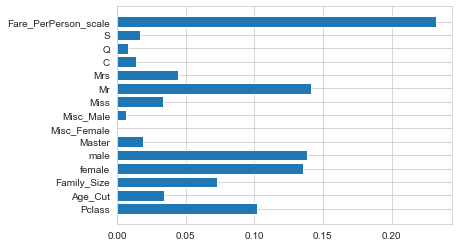

In [188]:
plt.barh(X.columns, best_forest.feature_importances_ )

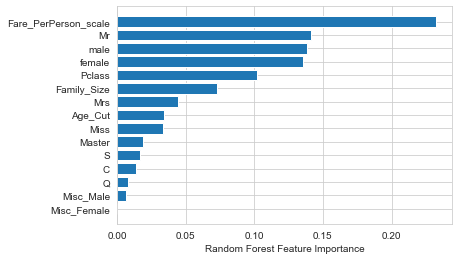

In [189]:
sorted_idx = best_forest.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], best_forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

### Model 8: Gradient Boosting

In [190]:
start_time = datetime.now()
best_gboost = GradientBoostingClassifier(random_state = 0, learning_rate=0.1, n_estimators=150)
best_gboost.fit(X, Y)
trainscore_best_gboost = round(best_gboost.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_gboost_cv = cross_val_score(best_gboost,X,Y,cv=10, n_jobs=-1)
validscore_best_gboost = round(best_gboost_cv.mean()*100,2)
end_time_cv = datetime.now()

print('Gradient Boosting Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_gboost), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set:', str(validscore_best_gboost), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

Gradient Boosting Accuracy Score with Tuning:
----------------
Training set: 89.45 %
Running time: 0:00:00.141624
----------------
Validation set: 83.05 %
Running time: 0:00:00.423913


In [198]:
### Model 9: XG Boost

In [192]:
start_time = datetime.now()
best_xgboost = XGBClassifier(random_state = 0,subsample = 0.55,reg_lambda=2,reg_alpha=1,n_estimators=550,min_child_weight=0.01,max_depth=5,learning_rate=0.15,gamma=1,colsample_bytree=0.75, use_label_encoder=False)
best_xgboost.fit(X, Y)
trainscore_best_xgboost = round(best_xgboost.score(X,Y)*100,2)
end_time = datetime.now()

start_time_cv = datetime.now()
best_xgboost_cv = cross_val_score(best_xgboost,X,Y,cv=10, n_jobs=-1)
validscore_best_xgboost = round(best_xgboost_cv.mean()*100,2)
end_time_cv = datetime.now()

print('XG Boost Accuracy Score with Tuning:')
print('----------------')
print('Training set:', str(trainscore_best_xgboost), '%')
print('Running time: {}'.format(end_time - start_time))
print('----------------')
print('Validation set:', str(validscore_best_xgboost), '%')
print('Running time: {}'.format(end_time_cv - start_time_cv))

[16:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Accuracy Score with Tuning:
----------------
Training set: 88.89 %
Running time: 0:00:00.540279
----------------
Validation set: 83.5 %
Running time: 0:00:02.930208


# 9. Model Submission

In [193]:
#Make predictions based on the features using the test data set

predictions_log = best_log.predict(df_test_final)
predictions_knn = best_knn.predict(df_test_final)
predictions_svc_rbf = best_svc_rbf.predict(df_test_final)
predictions_gauss = best_gauss.predict(df_test_final)
predictions_tree = best_tree.predict(df_test_final)
predictions_forest = best_forest.predict(df_test_final)
predictions_gboost = best_gboost.predict(df_test_final)
predictions_xgboost = best_xgboost.predict(df_test_final)

In [194]:
#Convert the prediction output to dataframe

#Prediction using logistic regression
submission_array_log = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_log}
submission_dataframe_log = pd.DataFrame(data =submission_array_log)

#Prediction using K Neighbours
submission_array_knn = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_knn}
submission_dataframe_knn = pd.DataFrame(data =submission_array_knn)

#Prediction using support vector classifier
submission_array_svc_rbf = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_svc_rbf}
submission_dataframe_svc_rbf = pd.DataFrame(data =submission_array_svc_rbf)

#Prediction using Gaussian Naive Bayes
submission_array_gauss = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_gauss}
submission_dataframe_gauss = pd.DataFrame(data =submission_array_gauss)

#Prediction using Decision Trees
submission_array_tree = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_tree}
submission_dataframe_tree = pd.DataFrame(data =submission_array_tree)

#Prediction using Random Forest
submission_array_forest = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_forest}
submission_dataframe_forest = pd.DataFrame(data =submission_array_forest)

#Prediction using Gradient Boost
submission_array_gboost = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_gboost}
submission_dataframe_gboost = pd.DataFrame(data =submission_array_gboost)

#Prediction using XG Boost Classifier
submission_array_xgboost = {'PassengerId':df_test.PassengerId, 'Survived' :predictions_xgboost}
submission_dataframe_xgboost = pd.DataFrame(data =submission_array_xgboost)

In [195]:
#prepare submission files

submission_dataframe_log.to_csv('submission_dataframe_log.csv', index =False)
submission_dataframe_knn.to_csv('submission_dataframe_knn.csv', index =False)
submission_dataframe_svc_rbf.to_csv('submission_dataframe_svc_rbf.csv', index =False)
submission_dataframe_gauss.to_csv('submission_dataframe_gauss.csv', index =False)
submission_dataframe_tree.to_csv('submission_dataframe_tree.csv', index =False)
submission_dataframe_forest.to_csv('submission_dataframe_forest.csv', index =False)
submission_dataframe_gboost.to_csv('submission_dataframe_gboost.csv', index =False)
submission_dataframe_xgboost.to_csv('submission_dataframe_xgboost.csv', index =False)